# Mathematics of Poker
Part 1, Chapter 3:  Estimating Parameters and Bayes' Theorem

-----------------------




### I. Estimating Parameters, Classical Statistics

Suppose we have a Limit Holdem player who has played 16,900 hands with a winrate `x_bar` of `1.15 BB per 100` hands 
and with a standard deviation  `s` of `2.1 BB / hand`. These are sample statistics, but what can they tell us about the true underlying winrate `mu` and standard deviation `sigma`, the population parameters? We assume that all winrate in the range from -1 to 1  BB /  _1 hand_ are possible. 

We know that there will be uncertainty about the population statistics. Here, we will study the **maximum liklihood estimate** of the population mean. 


We proceed by taking the sample standard deviation to be a good estimate of `sigma` and then consider all possible win rates. Each win rate then will correspond to a (normal) sampling distribution with some mean `m` and a standard deviation `s_N`. 

Let's plot a few of these. 

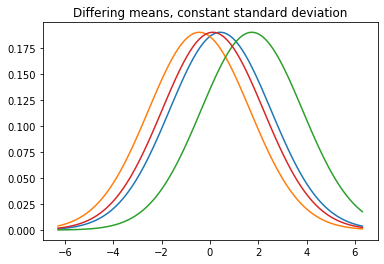

In [69]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# set stats
sample_mu = 1.15/100
standard_deviation = 2.1

# create the x axis
x = np.linspace(sample_mu - 3*standard_deviation, sample_mu + 3*standard_deviation, 100)

# create a few data sets with different mu values
mu_list = [np.random.randn() + sample_mu for i in range(4)]

# plot these 
for mu in mu_list:
    plt.plot(x, stats.norm.pdf(x, mu, standard_deviation))

plt.title("Differing means, constant standard deviation")
    
plt.show()


**Confidence Intervals**

(in the book this section has typos)


Suppose we have a sample `N` that consists of 16900 hands taken from an underlying distribution that with a mean, or winrate, of `1.15 BB/100 h` and a `sigma` of `2.1 BB/h`. 

Then we know that the standard devation of the sample size is: 

In [63]:
# set the situation statistics
N = 16900 # number of hands
sigma = 2.1

sigma_N = sigma * np.sqrt(N)


Now let's conver this to the per /100 hands number

In [61]:
sigma_100 = sigma_N / (16900/100)
print("Standard deviation for sample size: ", sigma_100)


Standard deviation for sample size:  1.6153846153846154


This is larger than the winrate itself! 

### II. Bayes Theorem

$$ P(A \mid B) = \frac{P(B \mid A) \, P(A)}{P(B)} $$


The Classic Example from Medicine

Suppose we have a screening process for some condition. If an individual with the condition is screened, the screening process identifies the condition is present 80% of the time. If an individual without the condition is screened, the screening process improperly identifies the condition the patient as having the condition 10% of the time. On average, 5% of the population will have this condition. 

What is the probability that a new person who has tested positive actually has the condition? 

In [75]:
# let's set our intial info

# A = the screening process returns a positive result
# B = the patient has the condition 

# We are interested in P(B|A)

# First, we need to define P(A|B), or the probability the screening process has returned a positive result
# given that the person has the condition

P_A_B = 0.8

# also, we will define P(A|notB), 
# the proportion of the time the screening returns positive when the patient does not have the condition

P_A_notB = 0.1


# now, the prior population information is P(B)
# this is the incidence of the condition in the general population 

P_B = 0.05
P_notB = 0.95



# p(B|A) = P(A|B) * P(B) / P(A)
# How can we get P(A), namely the frequency with which the screening returns a positive result?

# the numerator is easy
numerator = P_A_B * P_B

# this information we have to construct
denominator = 0.8 * 0.05 + (1 - 0.9) * (0.95)

print(numerator/denominator)

0.2962962962962964


**Excercise**

Suppose the screening correctly identified a patient who has the condition `100%` of the time, all else reamining equal. Now what is the probability that a person who is unknown actually has the condition after testing positive? What if this probability is `p`? Can you write a function to input `p` and output this probability? 

#### Raising in the Cutoff: Poker "Maniac" Example

We have an unknown player raise a hand a in the cutoff. Based on our prior information and reads, we assume that: 

There is an 10% chance he is a "maniac" who raises 80% of hands from the cutoff
There is a 90% chance he is "normal" person who raises 10% of hands from there. 

What is the probability, given that this player has just raised, that he is a maniac? 


In [81]:
"""
prob(maniac|raise) = ( prob(raise|maniac) * prob(maniac) ) / prob_raise

- prob(raise|maniac) = 0.8
- prob(maniac) = .1
- prob(raise) = .1 * .8 + .9 * .1

"""

print("Probability he is a maniac: ", (0.8 * 0.1)  / (.1*.8 + .9*.1))




Probability he is a maniac:  0.47058823529411764


### III. Estimating Parameters, Bayesian Style

In [ ]:
# TODO -- TOO LAZY TO RECREATE THEIR CALCULATIONS NOW
# MIGHT USE SOME CONSTRUCTS FROM THINK BAYES TO MAKE THIS QUICKER 